In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.85, 51.51, 59.91, 39.91, 19.01, 14.6, 40.71, 47.61, 32.77, 25.05]
The temperature information received is: [21.35, 20.34, 12.62, 24.35, 27, 28.32, 33.27, 18.09, 32.42, 28.73]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.85,21.35
1,London,51.51,20.34
2,Oslo,59.91,12.62
3,Beijing,39.91,24.35
4,Mumbai,19.01,27.00
5,Manila,14.60,28.32
6,New York,40.71,33.27
7,Seattle,47.61,18.09
8,Dallas,32.77,32.42
9,Taipei,25.05,28.73


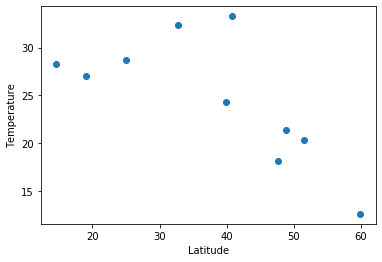

In [5]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [6]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    21.251020
1    20.418504
2    17.789507
3    24.049025
4    30.590222
5    31.970446
6    23.798644
7    21.639111
8    26.283673
9    28.699847
Name: lat, dtype: float64


In [7]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.31x +36.54


The r-squared is: 0.5020867408513496


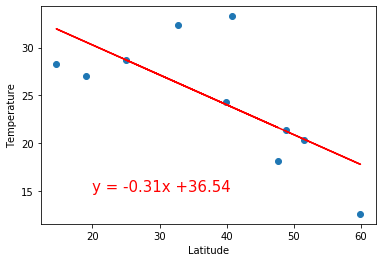

In [8]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

In [9]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 22.84.


In [10]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 25.45
